Frozen Lake Environment:


c:\Users\rites\miniconda3\Lib\site-packages\gym\envs\toy_text\frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake-v1", render_mode="rgb_array")
  logger.warn(
c:\Users\rites\miniconda3\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


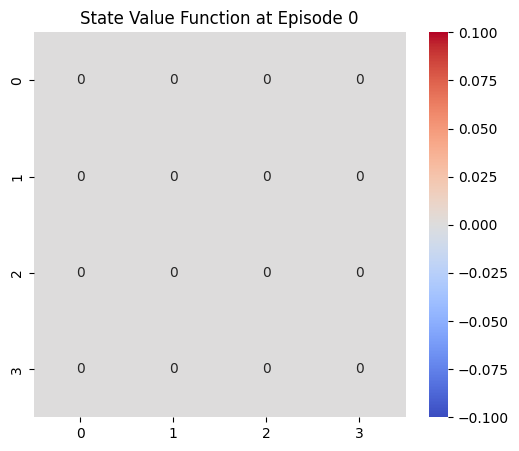

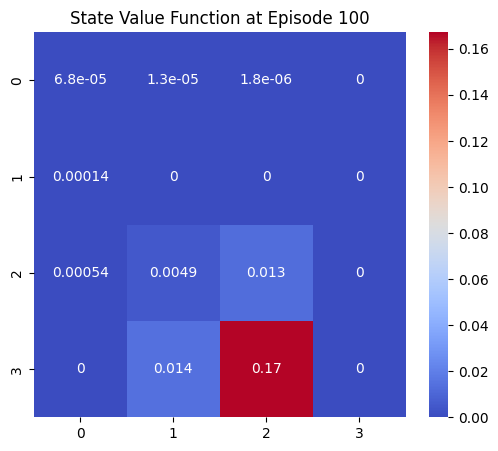

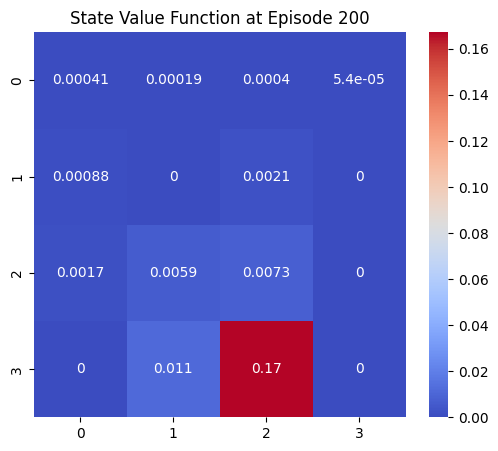

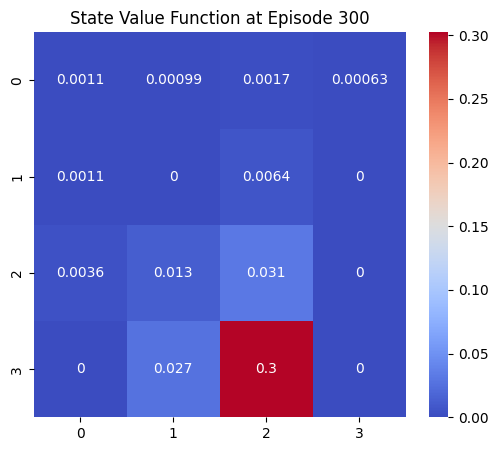

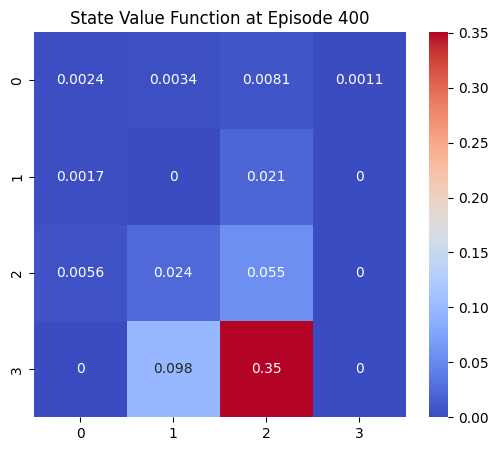

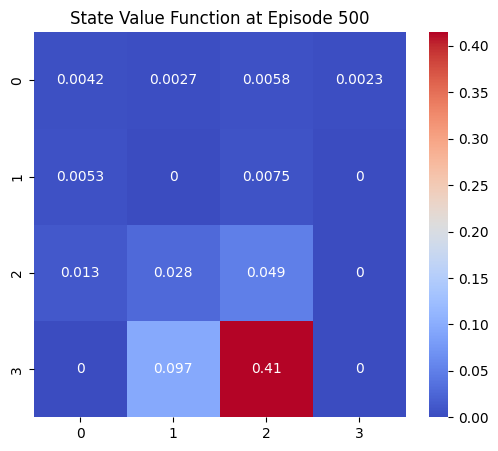

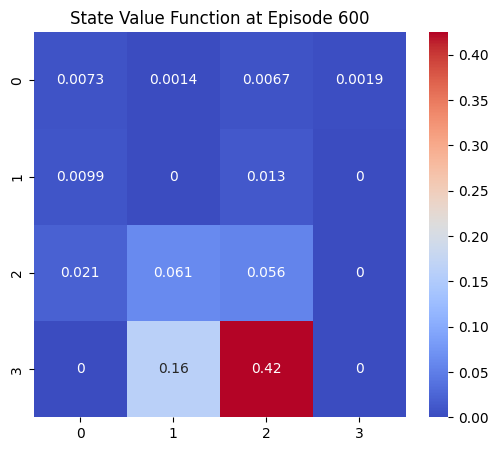

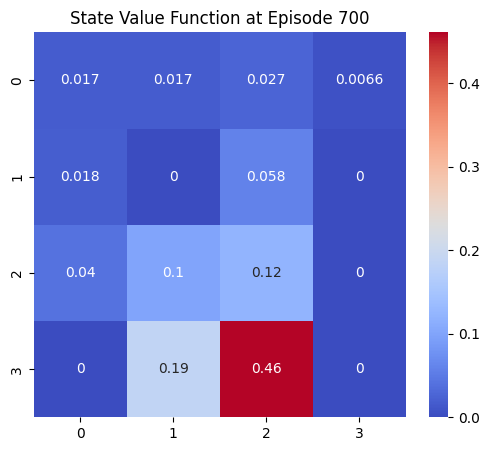

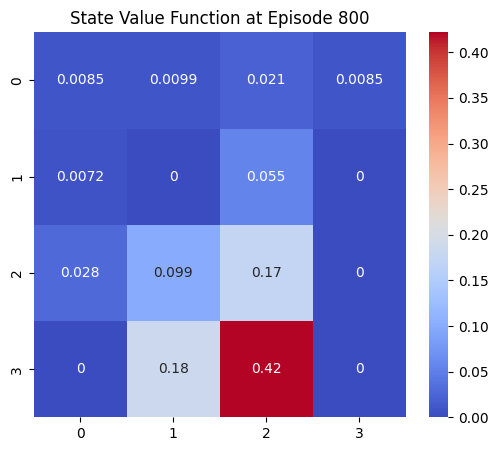

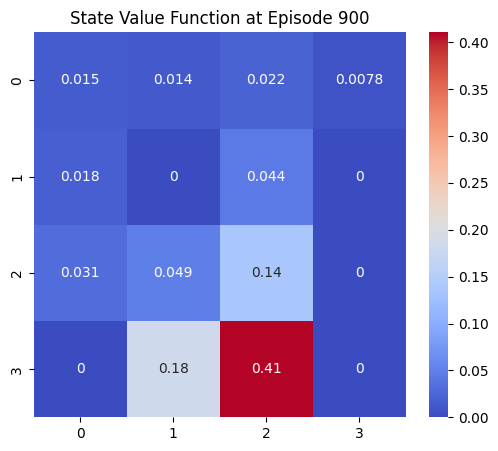

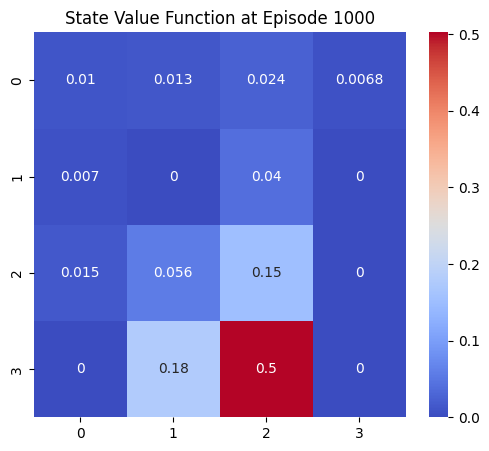

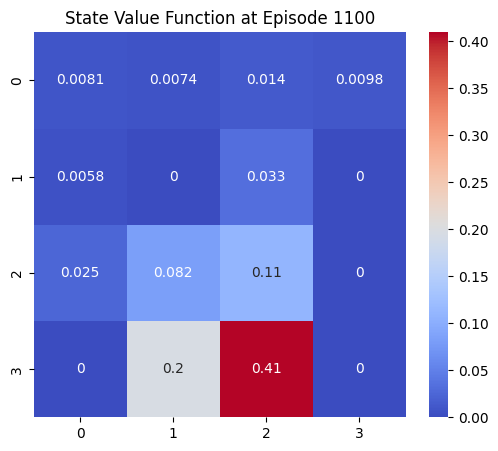

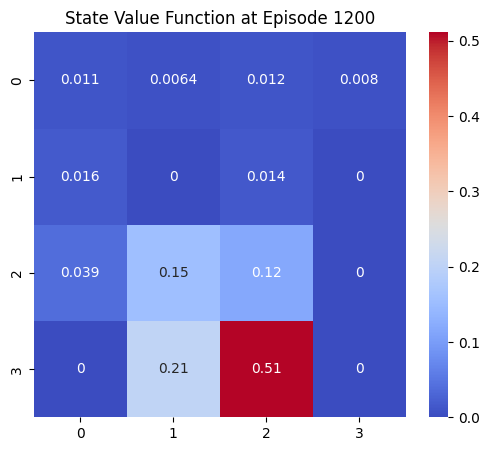

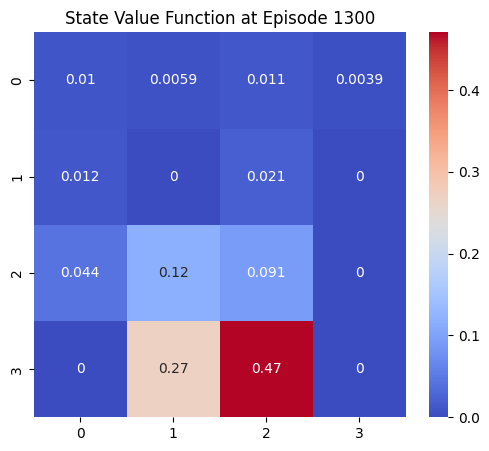

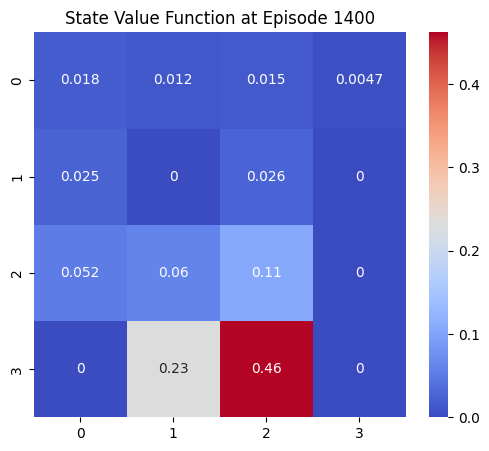

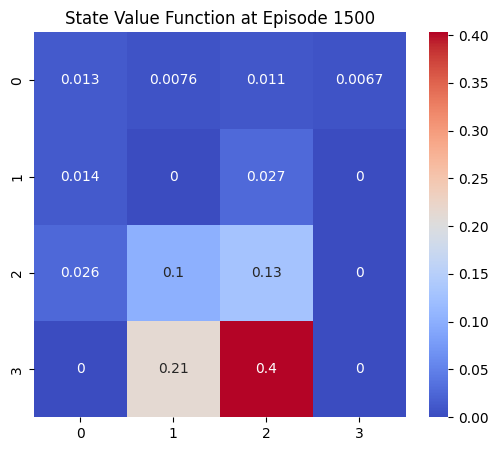

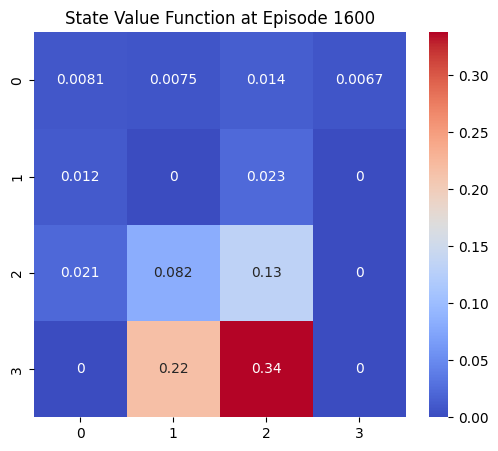

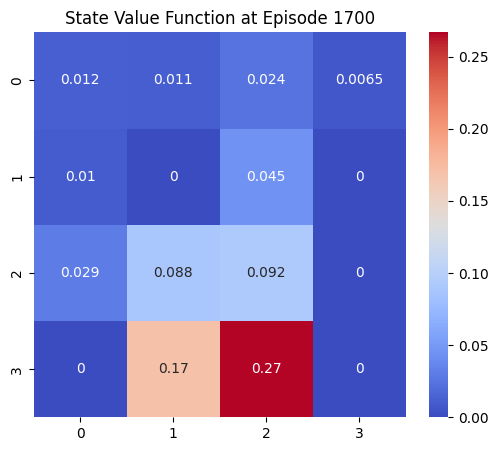

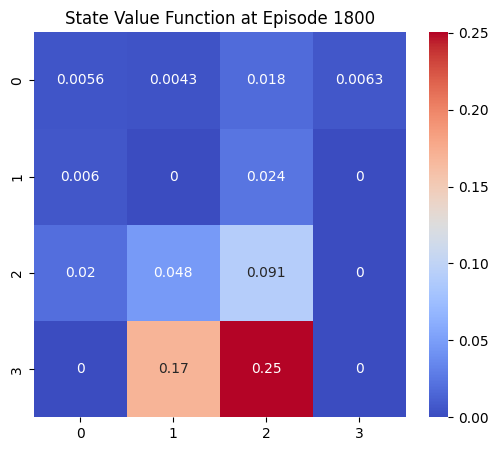

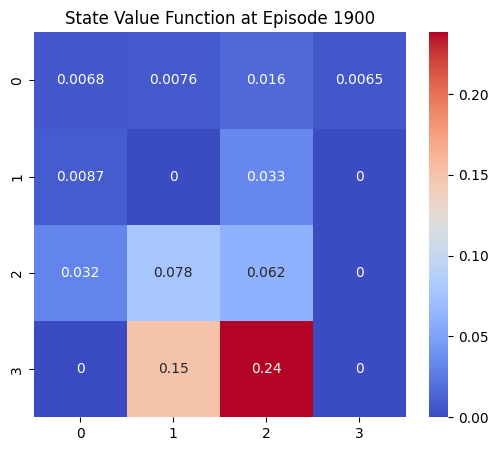

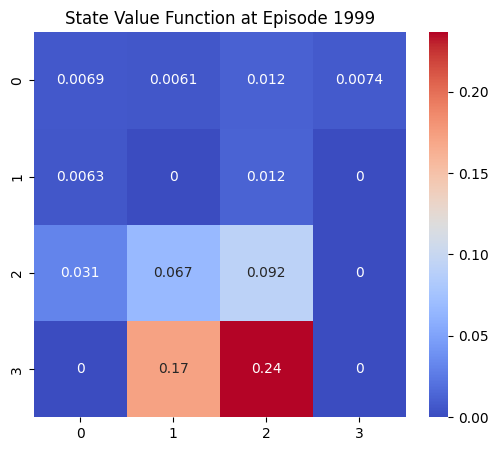

Final Learned Value Function:
[0.00689243 0.00607248 0.01152502 0.00741344 0.00631767 0.
 0.01238347 0.         0.03061066 0.06723527 0.09211583 0.
 0.         0.17269395 0.23649809 0.        ]


In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import seaborn as sns
import time

class TD0Agent:
    def __init__(self, env, alpha=0.1, gamma=0.99):
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.V = np.zeros(env.observation_space.n)  # State-value function
        self.grid_size = int(np.sqrt(env.observation_space.n))  # Assuming square grid
    
    def policy(self, state):
        """Random policy: chooses actions uniformly."""
        return self.env.action_space.sample()

    def train(self, episodes=1000, visualize_interval=100):
        for episode in range(episodes):
            state = self.env.reset()[0]  # Reset environment
            done = False

            while not done:
                action = self.policy(state)
                next_state, reward, done, _, _ = self.env.step(action)

                # TD(0) update rule
                self.V[state] += self.alpha * (reward + self.gamma * self.V[next_state] - self.V[state])

                state = next_state  # Move to the next state

            # Visualize every few episodes
            if episode % visualize_interval == 0 or episode == episodes - 1:
                self.visualize_value_function(episode)

    def visualize_value_function(self, episode):
        """Visualizes the learned state-value function as a heatmap."""
        plt.figure(figsize=(6, 5))
        sns.heatmap(self.V.reshape(self.grid_size, self.grid_size), annot=True, cmap="coolwarm", cbar=True)
        plt.title(f"State Value Function at Episode {episode}")
        plt.show()
        time.sleep(0.5)  # Pause to see updates

    def render_frozen_lake(self):
        """Renders the Frozen Lake Environment."""
        self.env.reset()
        self.env.render()

    def get_value_function(self):
        return self.V

# Example Usage
env = gym.make("FrozenLake-v1")
# env = gym.make("FrozenLake-v1", render_mode = 'human')  # A simple gridworld environment
agent = TD0Agent(env)

# Render the initial FrozenLake grid
print("Frozen Lake Environment:")
agent.render_frozen_lake()

# Train the agent and visualize updates
agent.train(episodes=2000, visualize_interval=100)

# Print final learned state values
print("Final Learned Value Function:")
print(agent.get_value_function())
